# A. Présenation et analyse exploratoire des données

<p><img align=center src="images/all.png" width=500 height=450/></p>

<div style="text-align: center;">
<h3><b>Cité antique de Fréjus</b></h3>

<h3><b>Analyse de données envirnnementales et archéologiques avec les outils de l'apprentissage automatique</b></h3>

<h3>Partie 1. Objectifs d'étude, présentation et analyse expliratoire des données</h3>
</div>

## Contenu

#### 1. Objectifs d'étude
    1.1. Objectifs
    1.2. étapes du travail et les outils:

#### 2. Présentation et analyse exploratoire des données
    2.0. Information générale
    2.2. Distance pondérée aux cours d'eau
    2.7. Types d'occupation du sol
         2.2.1. Répartition de données par types d'occupation du sol (en pourcentage)
    2.1. Pentes
    2.3. Exposition
    2.4. Ombrage (Hillshade) à midi
    2.5. Ombrage (Hillshade) quelque minute avant le couchée du soleil
    2.6. Ombrage (Hillshade) 45°
    2.7. Données numériques
         2.7.1. Matrix de corrélation

Nous allons d'abord importer tout les bibliothèques nécessaires

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

### 1.1. Objectifs
### 1.2. étapes du travail et les outils:
- traitement et préparation des données bruts (calcule des distance de coûte, produir le couche de pente etc. avec ArcGIS et QGIS);
- analyse exploratoire et visualization des données (Python, pandas, matplotlib);
- modèles d'apprentissage automatique (Random Forest, Ligistic Regression, CatBoosting);

### 2. Présentation de données

#### 2.0.  Information générale

In [4]:
# charger et montrer 5 premier lignes les données
df = pd.read_csv("data/features_target.csv", sep=";")
df.head()

,id,slope,cd_water,aspect,hill90,hill5,hill45,clc00,numpoints,target
0,1,4.98010,0.256047,9,254,0,195,312,0,0
1,2,3.36810,0.296268,2,254,0,187,312,0,0
2,3,3.86523,0.374666,2,254,0,186,312,0,0
3,4,5.56061,0.471633,2,253,0,191,312,0,0
4,5,9.50320,0.589352,10,251,0,204,312,0,0


<h3 style="text-align: center;"><b>Description des champs</b></h3>
<table>
    <tr>
        <th>NOM DU CHAMP</th>
        <th style="text-align: center;">DESCRIPTION</th>
    </tr>
    <tr>
        <td style="text-align: center;">slope</td>
        <td style="text-align: center;">pentes</td>
    </tr>
    <tr>
        <td style="text-align: center;">cd_water</td>
        <td style="text-align: center;"> distance pondérée aux cours d'eau</td>
    </tr>
    <tr>
        <td style="text-align: center;">aspect</td>
        <td style="text-align: center;">exposition</td>
    </tr>
    <tr>
        <td style="text-align: center;">hill90</td>
        <td style="text-align: center;">Ombrage (Hillshade) à midi</td>
    </tr>
    <tr>
        <td style="text-align: center;">hill5</td>
        <td style="text-align: center;">Ombrage (Hillshade) quelque minute avant le couchée du soleil</td>
    </tr>
    <tr>
        <td style="text-align: center;">hill45</td>
        <td style="text-align: center;">Ombrage (Hillshade) 45°</td>
    </tr>
    <tr>
        <td style="text-align: center;">clc00</td>
        <td style="text-align: center;">types d'occupation du sol</td>
    </tr>
    <tr>
        <td style="text-align: center;">target</td>
        <td style="text-align: center;">class visé</td>
    </tr>
</table>

In [81]:
# nombre de lignes et de champs
df.shape

(35255, 10)

Nous avons 35255 lignes (object) et 10 champs

In [82]:
# heuresement nous nù'avons pas de données manquantes
df.isna().sum()

id           0
slope        0
cd_water     0
aspect       0
hill90       0
hill5        0
hill45       0
clc00        0
numpoints    0
target       0
dtype: int64

#### Nous allons voir tous ces features plus en details

La signification/apport de chaque couche dans l'étude

for all of these layers describe an theorical importance for human attractivity. 

### 2.1. Types d'occupation du sol

    Nom du feature: CORINE Land Cover - France métropolitaine - Changements 1990-2000
    
    Description: Inventaire biophysique du changement d'occupation des sols entre 1990 et 2000 suivant la
    nomenclature CORINE Land Cover en 44 postes.
    
    This period was took because its the period of the most intences archaeological researches (probably I should show a graph showing this dynamic of researchs).

source: https://land.copernicus.eu/pan-european/corine-land-cover/clc-2000

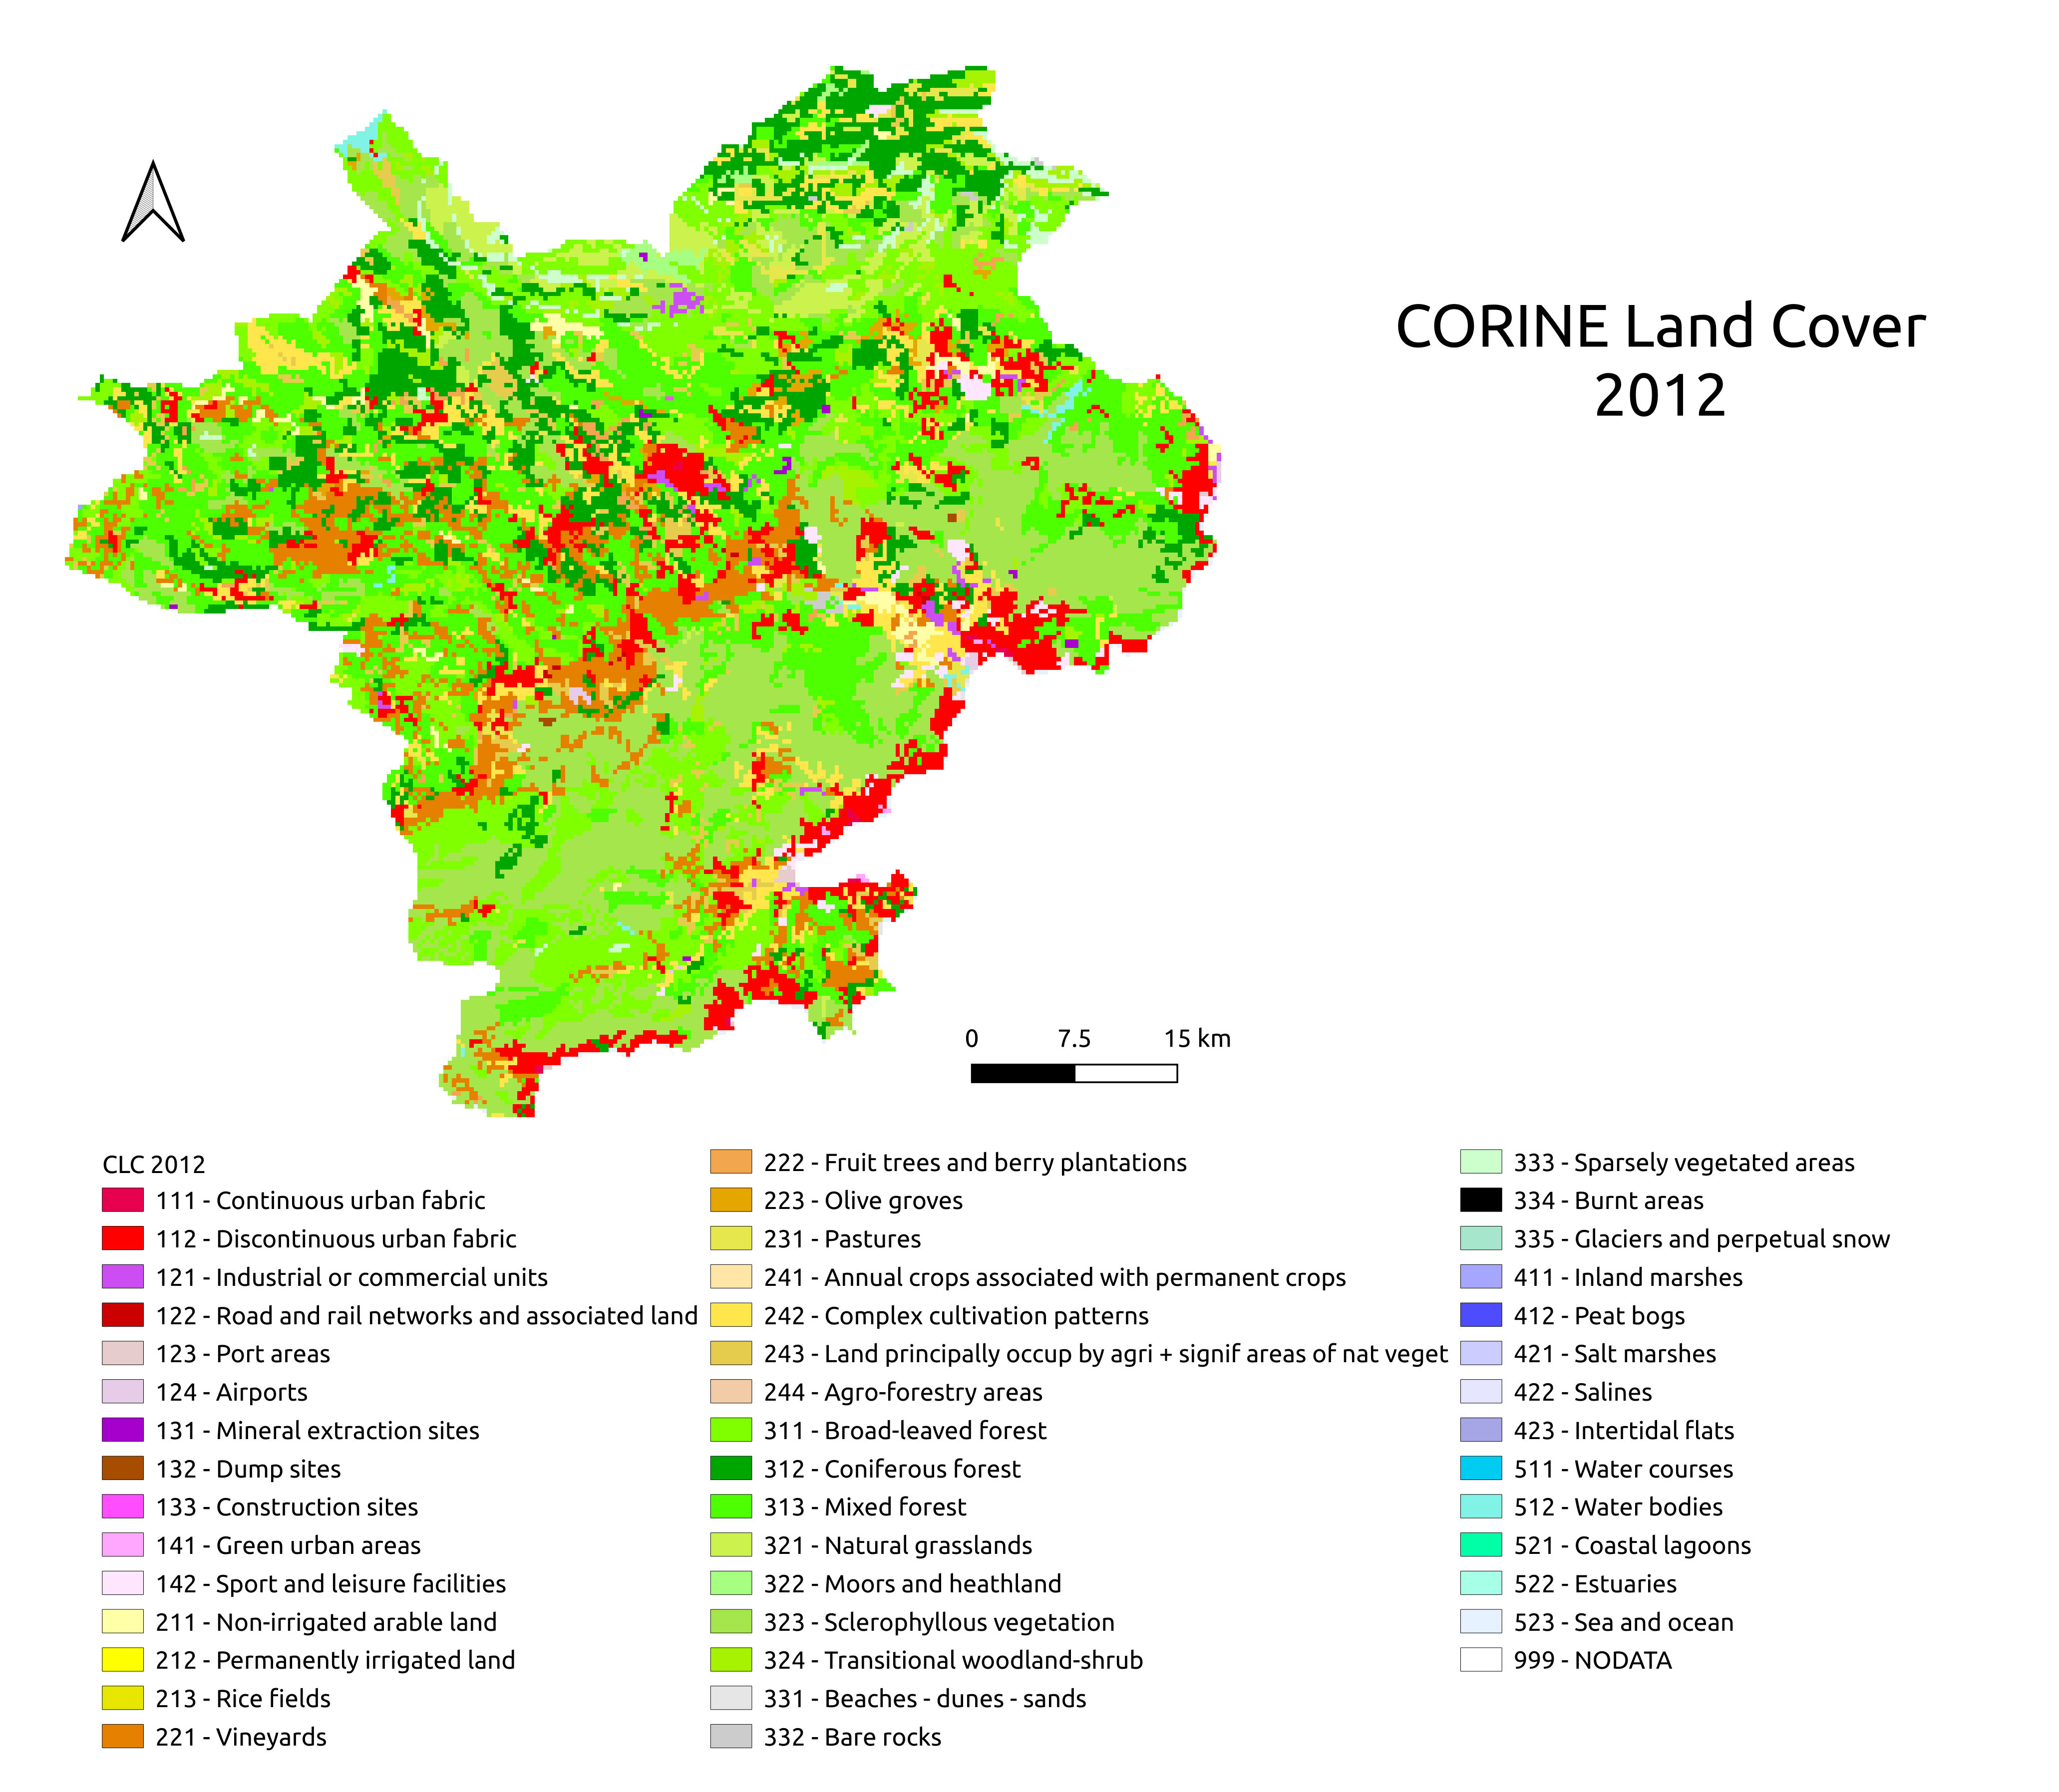

### Répartition de données par types d'occupation du sol (en pourcentage)

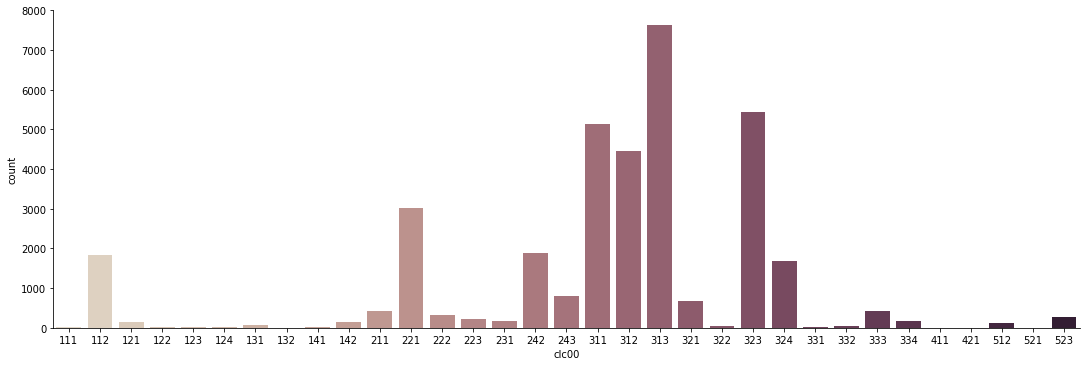

In [83]:
sns.catplot(x="clc00", kind="count", palette="ch:.25", height=5, aspect=15/5, data=df);

## Modèle numérique de terrain
Next 5 features sont pruidts à partir de modèle numérique de terrain. Voici ces caracterestiques

Date d'acquisition: 11/11/2010

Nom du couche: EarthExplorer - FGDC Metadata - GMTED2010 - GMTED2010N30E000

Source:  U.S. Geological Survey (USGS), https://earthexplorer.usgs.gov/

Title:  Global Multi-Resolution Terrain Elevation Data 2010 (GMTED2010)

Abstract:  The USGS and the NGA have collaborated on the development of a notably enhanced global elevation model named the GMTED2010 that replaces GTOPO30 as the elevation dataset of choice for global and continental scale applications.  The new model has been generated at three separate resolutions (horizontal post spacing) of 30 arc-seconds (about 1 kilometer), 15 arc-seconds (about 500 meters), and 7.5 arc-seconds (about 250 meters).  This new product suite provides global coverage of all land areas from latitude 84 degrees N to 56 degrees S for most products, and coverage from 84 degrees N to 90 degrees S for several products.  Some areas, namely Greenland and Antarctica, do not have data available at the 15- and 7.5-arc-second resolutions because the input source data do not support that level of detail.

30x30 meters

### 2.2. Distance pondérée aux cours d'eau, en heures

### 2.3. Pentes

Le couche de pentes a été créé dans le logiciel ArcGIS avec un outil Pentes. Unité de mesure: degrées

Dans le contexte de notre étude ce couche répresent le surface de friction, elle nous permet d'évaluer la difficulté de deplacement sur le territoire en question

Text(0, 0.5, 'Number of pixels')

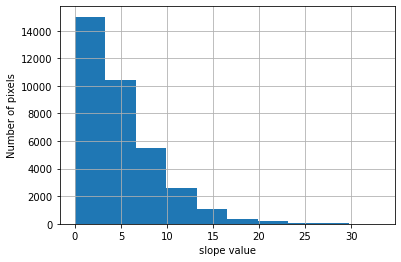

In [84]:
# nombre de pixels par valeur de pentes
fig = df.slope.hist(bins=10)
fig.set_xlabel('slope value')
fig.set_ylabel('Number of pixels')

### 2.4. Exposition

Le couche de pentes a été créé dans le logiciel ArcGIS avec un outil "Aspect"

<p><img align=left src="images/aspect.png" width=500 height=400/></p>

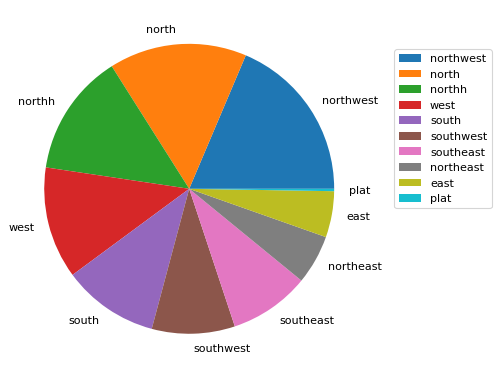

In [8]:
aspect_vals = {9: "northwest", 2: "north", 10: "northh", 8: "west", 6: "south",
               7: "southwest", 5: "southeast", 3: "northeast", 4: "east", 1: 'plat'}
labels = [aspect_vals[i] for i in aspect_vals]

figure(figsize=(8, 6), dpi=80)

# number de pixels par catégorie de pents
a = list(df.aspect.value_counts())
plt.pie(a, labels = labels, normalize = True)
plt.legend(bbox_to_anchor=(1.35, 0.9), loc='upper right');

### 2.5. Ombrage (Hillshade) 45°

Text(0, 0.5, 'Number of pixels')

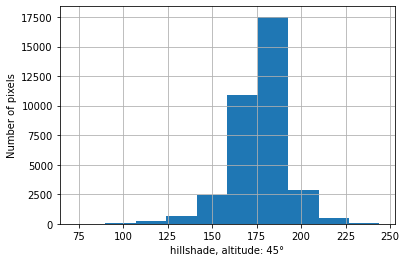

In [85]:
fig = df.hill45.hist(bins=10)
fig.set_xlabel('hillshade, altitude: 45°')
fig.set_ylabel('Number of pixels')

### 2.6. Ombrage (Hillshade) à midi

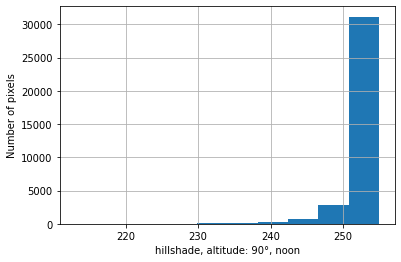

In [86]:
fig = df.hill90.hist(bins=10)
fig.set_xlabel('hillshade, altitude: 90°, noon')
fig.set_ylabel('Number of pixels');

### 2.7. Ombrage (Hillshade) quelque minute avant le couchée du soleil

Text(0, 0.5, 'Number of pixels')

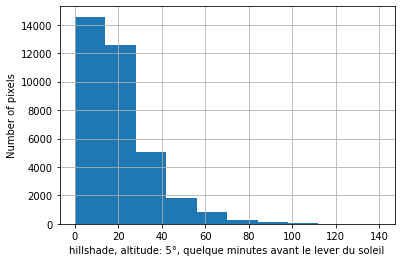

In [87]:
fig = df.hill5.hist(bins=10)
fig.set_xlabel('hillshade, altitude: 5°, quelque minutes avant le lever du soleil')
fig.set_ylabel('Number of pixels')

## 3. Analyse exploratoire

Nous avons deux type des classes: catégorielle et celle numérique:
- catégorielle: exposition (aspect), type d'occupation du sol (CorineLandCover)

- numérique: pentes, distance pondérée aux cours d'eau, 3 types d'ombrage

In [88]:
df.aspect.value_counts()

6     6563
5     5414
7     4819
4     4399
3     3780
8     3263
9     3170
2     1942
10    1812
1       93
Name: aspect, dtype: int64

### Matrix de corrélation

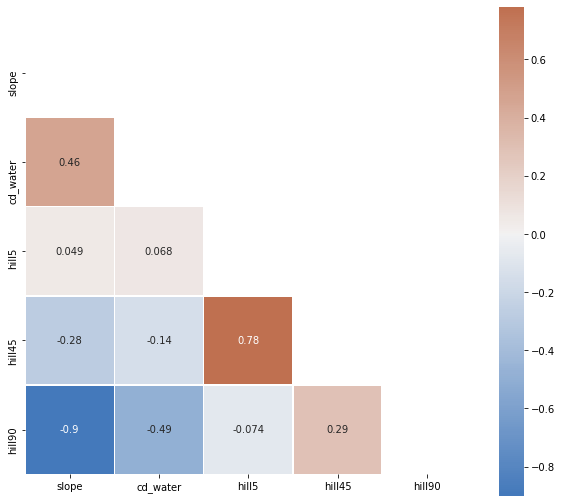

In [141]:
# Matrix de corrélation
corr = df[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, 
            center=0,square=True, annot=True, 
            linewidths=.5, cbar_kws={"shrink": .9});